In [1]:
import pandas as pd # import pandas 
import matplotlib.pyplot as plt
import os 
bookings = pd.read_csv("/Users/brindamunuswamy/Desktop/MIS581/h2Features.csv") # read CSV into pandas
bookings.head(15) #reading top 5 rows

,is_canceled,lead_time,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,different_assigned_room
0,0,6,2,1,0.0,0,2,7,4,0,0,0,0,1,0,3,0,0,0
1,1,88,4,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
2,1,65,4,1,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
3,1,92,4,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,2,0
4,1,100,2,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
5,1,79,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
6,0,3,3,1,0.0,0,2,5,4,0,0,0,1,1,0,4,0,0,0
7,1,63,3,1,0.0,0,1,6,4,0,0,0,0,1,0,3,0,0,0
8,1,62,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
9,1,62,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0


In [2]:
bookings.info() # this is selected list of features for prediction model h2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79330 non-null  int64  
 1   lead_time                       79330 non-null  int64  
 2   stays_in_week_nights            79330 non-null  int64  
 3   adults                          79330 non-null  int64  
 4   children                        79330 non-null  float64
 5   babies                          79330 non-null  int64  
 6   meal                            79330 non-null  int64  
 7   market_segment                  79330 non-null  int64  
 8   distribution_channel            79330 non-null  int64  
 9   is_repeated_guest               79330 non-null  int64  
 10  previous_cancellations          79330 non-null  int64  
 11  previous_bookings_not_canceled  79330 non-null  int64  
 12  booking_changes                 

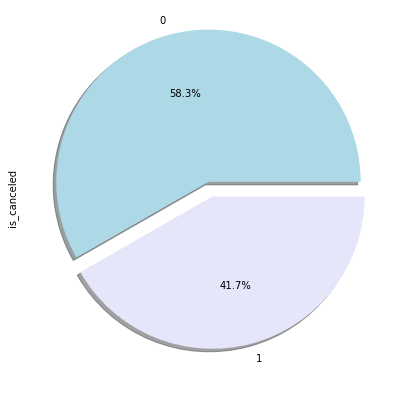

In [3]:
# cancellation rate benchmark based on full data set for h1 
import matplotlib.pyplot as plt
piedata = bookings['is_canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) 
plt.show() # displaying only chart without the extra information

In [4]:
# creating dataframe with predictor variables - columns 1-18
X=bookings.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

In [5]:
#df = df.astype({"Column 1": float, "Column 2": int})
#X=X.astype({"adr": int})

In [7]:
# creating dataframe with dependent variable column 0 
Y = bookings.iloc[:,[0]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   is_canceled  79330 non-null  int64
dtypes: int64(1)
memory usage: 619.9 KB


In [8]:
#creating test and train dataset in 70-30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [9]:
Y_train['is_canceled'].value_counts()

0    32310
1    23221
Name: is_canceled, dtype: int64

In [10]:
Y_test['is_canceled'].value_counts()

0    13918
1     9881
Name: is_canceled, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(solver='liblinear', random_state=0)#default parameters without explanation

In [12]:
import numpy as np
LogReg.fit(X_train,np.ravel(Y_train)) # training the model with training datasets 

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
Y_pred=LogReg.predict(X_test) # Predictions for test data set
predictions = [round(value) for value in Y_pred]

In [14]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, predictions)
# accuracy of the model based on predictions and actuals of the dependent variable
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.22%


In [15]:
# default values with explanations 
#rf10=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            #max_depth=None, max_features='auto', max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=1, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            #oob_score=False, random_state=None, verbose=0,
            #warm_start=False)
#rf10.fit(X_train,Y_train)
#Y_pred10=rf10.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred10))

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
LogReg_score = cross_val_score(LogReg, X, np.ravel(Y), cv=10, scoring='roc_auc') # evaluation of model on AUC score
print("Mean AUC Score - Random Forest: ", LogReg_score.mean())

Mean AUC Score - Random Forest:  0.8458924532091524


In [18]:
print(confusion_matrix(Y_test, Y_pred)) # evaluation of model using confusion matrix

[[13089   829]
 [ 4116  5765]]


In [19]:
print(classification_report(Y_test, Y_pred)) # evaluation of model using classification report
# the values for class '1' is considered for model comparison

              precision    recall  f1-score   support

           0       0.76      0.94      0.84     13918
           1       0.87      0.58      0.70      9881

    accuracy                           0.79     23799
   macro avg       0.82      0.76      0.77     23799
weighted avg       0.81      0.79      0.78     23799



In [20]:
df = pd.DataFrame(data=Y_pred, columns=["canceled"]) # checking the predictions for benchmark comparison 
df['canceled'].value_counts()

0    17205
1     6594
Name: canceled, dtype: int64

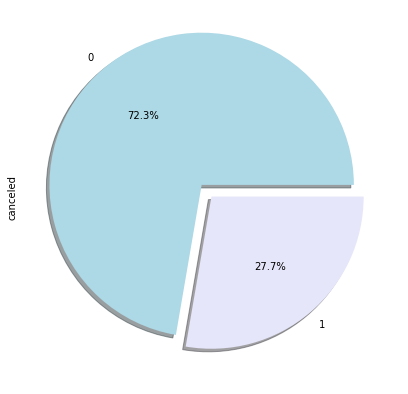

In [21]:
# using pie chart to show cancellation rate as predicted by the model 
piedata = df['canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) 
plt.show() # displaying only chart without the extra information
#benchmark
#0    46228
#1    33102